In [6]:
import os
import sys
import fitsio
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from   astropy.table import Table
from   scipy.interpolate import interp1d

In [18]:
import matplotlib

nice_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    "font.serif" : "Times New Roman",
}

matplotlib.rcParams.update(nice_fonts)


In [19]:
sys.path.append('{}/DESI'.format(os.environ['HOME']))

In [20]:
from schechter import schechter, named_schechter
from gama_limits import gama_field
from delta8_limits import d8_limits, delta8_tier
import pubplot

In [21]:
root = '{}/data/GAMA4/'.format(os.environ['HOME'])

fpath = root + 'gama_gold_ddp_n8.fits'
fpath

'/cosma/home/durham/dc-moor2/data/GAMA4/gama_gold_ddp_n8.fits'

In [22]:
#! ls /global/cscratch1/sd/mjwilson/norberg/GAMA4/

In [23]:
#ddps = fits.open(root + '/global/cscratch1/sd/mjwilson/norberg/GAMA4/gama_gold_ddp_n8.fits')
ddps = fits.open(root+'gama_gold_ddp_n8.fits')
ddps = ddps[1].header
#ddps

In [24]:
#! ls /global/cscratch1/sd/mjwilson/desi/BGS/Sam

In [65]:
field = 'G12'

In [66]:
randoms = Table.read('{}/data/GAMA4/randoms/randoms_bd_ddp_n8_{}_0.fits'.format(os.environ['HOME'], field))

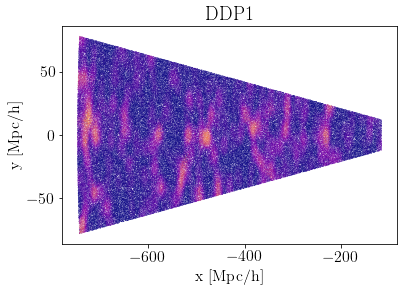

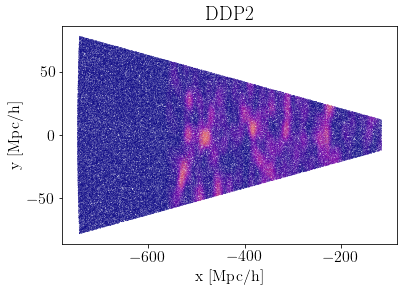

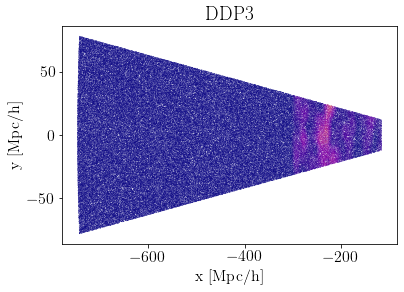

In [67]:
randoms_slice = randoms[np.abs(randoms['CARTESIAN_Z']) < 5.]

for idx in np.arange(1, 4, 1):
    plt.scatter(randoms_slice['CARTESIAN_X'],\
                randoms_slice['CARTESIAN_Y'],\
                c=randoms_slice['DDP{}_DELTA8'.format(idx)],\
                marker='.',\
                lw=0.0,\
                s=1,\
                vmin=-1.,\
                vmax=10.,\
                cmap='plasma')

    pl.xlabel('x [Mpc/h]')
    pl.ylabel('y [Mpc/h]')
    
    plt.title('DDP{}'.format(idx))
    plt.show()

In [68]:
d8_limits[0]


[-1.0, -0.75]

In [69]:
ddp.meta['DDP1_ZMIN']

0.0390699990093708

Text(0.5, 1.0, 'G12 GAMA Field')

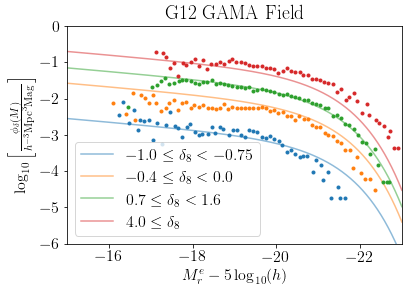

In [70]:
colors   = plt.rcParams['axes.prop_cycle'].by_key()['color']

# TO DO: take from header
d8_limits

for i in np.arange(0, 4, 1):
    ddp  = Table.read(root + 'gama_gold_{}_ddp_n8_d0_{}.fits'.format(field, i))
    vmax = Table.read(root + 'gama_gold_{}_ddp_n8_d0_{}_vmax.fits'.format(field, i), 'VMAX')
    lf   = Table.read(root + 'gama_gold_{}_ddp_n8_d0_{}_lumfn.fits'.format(field, i), 'VMAX')
    ref  = Table.read(root + 'gama_gold_{}_ddp_n8_d0_{}_lumfn.fits'.format(field, i), 'REFERENCE')
    
    lf   = lf[lf['N'] > 0]
    
    # trick for labelling
    if i != 3:
        pl.plot(ref['MS'], np.log10(ref['d{}_REFSCHECHTER'.format(i)]), label=r'${} \leq \delta_8 < {}$'.format(d8_limits[i][0], d8_limits[i][1]), alpha=0.5, c=colors[i])
        pl.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', marker='.', lw=0.0, c=colors[i])

    else:
        pl.plot(ref['MS'], np.log10(ref['d{}_REFSCHECHTER'.format(i)]), label=r'${} \leq \delta_8$'.format(d8_limits[i][0], d8_limits[i][1]), alpha=0.5, c=colors[i])
        #pl.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label=r'${:.2f} < \phi < {:.2f}$'.format(ddp.meta['DDP1_ZMIN'], ddp.meta['DDP1_ZMAX']), marker='.', lw=0.0, c=colors[i])
        pl.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', marker='.', lw=0.0, c=colors[i])

    
plt.xlabel(r'$M_r^e - 5 \log_{10}(h)$')
plt.ylabel(r'$\log_{10} \left[ \frac{\phi_\delta(M)}{h^{-3} {\rm Mpc}^{3} {\rm Mag}^{}} \right] $')
#plt.ylabel(r'$\log_{10}  \frac{\phi_\delta(M)}{h^{-3} {\rm Mpc}^{3} {\rm Mag}^{}} $')


pl.xlim(-15., -23.0)
pl.ylim(-6,   0)

#pl.legend(frameon=False, loc=1, ncol=2)
pl.legend()
pl.title('{} GAMA Field'.format(field))

Text(0.5, 1.0, 'All GAMA Fields')

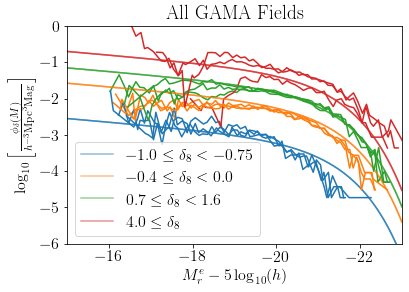

In [75]:
colors   = plt.rcParams['axes.prop_cycle'].by_key()['color']

for field in ['G9', 'G12', 'G15']:
    for i in np.arange(0, 4, 1):
        ddp  = Table.read(root + 'gama_gold_{}_ddp_n8_d0_{}.fits'.format(field, i))
        vmax = Table.read(root + 'gama_gold_{}_ddp_n8_d0_{}_vmax.fits'.format(field, i), 'VMAX')
        lf   = Table.read(root + 'gama_gold_{}_ddp_n8_d0_{}_lumfn.fits'.format(field, i), 'VMAX')
        ref  = Table.read(root + 'gama_gold_{}_ddp_n8_d0_{}_lumfn.fits'.format(field, i), 'REFERENCE')

        lf   = lf[lf['N'] > 0]

        if field == 'G15':
            if i != 3:
                pl.plot(ref['MS'], np.log10(ref['d{}_REFSCHECHTER'.format(i)]), label=r'${} \leq \delta_8 < {}$'.format(d8_limits[i][0], d8_limits[i][1]), alpha=0.5, c=colors[i])
            else:
                pl.plot(ref['MS'], np.log10(ref['d{}_REFSCHECHTER'.format(i)]), label=r'${} \leq \delta_8$'.format(d8_limits[i][0]), alpha=0.5, c=colors[i])

        else:
            pl.plot(ref['MS'], np.log10(ref['d{}_REFSCHECHTER'.format(i)]), alpha=0.5, c=colors[i])

        
        pl.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', c=colors[i])

pl.xlabel(r'$M_r^e - 5 \log_{10}(h)$')
pl.ylabel(r'$\log_{10} \left[ \frac{\phi_\delta(M)}{h^{-3} {\rm Mpc}^{3} {\rm Mag}^{}} \right] $')

pl.xlim(-15., -23.0)
pl.ylim(-6,   0)

#pl.legend(frameon=False, loc=1, ncol=2)
pl.legend()
pl.title('All GAMA Fields')

In [267]:
vmax.meta

OrderedDict([('EXTNAME', 'TilingCat'),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Extinction-corrected SDSS DR7 Petrosian mag'),
             ('TUCD6', 'phot.mag;em.opt.R'),
             ('TCOMM7', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD7', 'phot.mag;em.opt.U'),
             ('TCOMM8', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD8', 'phot.mag;em.opt.B'),
             ('TCOMM9', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD9', 'phot.mag;em.opt.R'),
             ('TCOMM10', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD10', 'phot.mag;em.opt.I

(array([733., 129., 499., 616., 200., 219., 483., 257., 150., 126., 138.,
        334., 169., 120.,  98., 126.,  95.,  91., 219.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 [<matplotlib.patches.Polygon at 0x7f1cd27be910>])

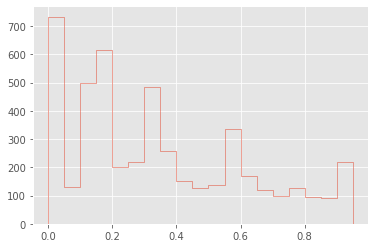

In [387]:
pl.hist(vmax['VZ'] / vmax['VMAX'], histtype='step', bins=np.arange(0., 1., 0.05))

In [269]:
lf.meta

OrderedDict([('EXTNAME', 'VMAX'),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Extinction-corrected SDSS DR7 Petrosian mag'),
             ('TUCD6', 'phot.mag;em.opt.R'),
             ('TCOMM7', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD7', 'phot.mag;em.opt.U'),
             ('TCOMM8', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD8', 'phot.mag;em.opt.B'),
             ('TCOMM9', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD9', 'phot.mag;em.opt.R'),
             ('TCOMM10', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD10', 'phot.mag;em.opt.I'),
 

/tmp/ipykernel_230816/1309480246.py:30: RuntimeWarning: divide by zero encountered in log10
  pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx), color=colour[idx])
/tmp/ipykernel_230816/1309480246.py:30: RuntimeWarning: divide by zero encountered in log10
  pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx), color=colour[idx])
/tmp/ipykernel_230816/1309480246.py:30: RuntimeWarning: divide by zero encountered in log10
  pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx), color=colour[idx])
/tmp/ipykernel_230816/1309480246.py:30: RuntimeWarning: divide by zero encountered in log10
  pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx), color=colour[idx])


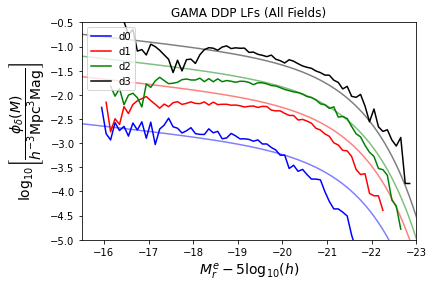

In [328]:
Ms = np.arange(-25.5, -15.5 , 0.1)
bin_centres =  (Ms[1:]+Ms[:-1])/2
colour = ['blue', 'red', 'green', 'black']

for idx in range(4):
    LF_G9  = Table.read(root + 'gama_gold_G9_ddp_n8_d0_{}_lumfn.fits'.format(idx))
    LF_G12 = Table.read(root + 'gama_gold_G12_ddp_n8_d0_{}_lumfn.fits'.format(idx))
    LF_G15 = Table.read(root + 'gama_gold_G15_ddp_n8_d0_{}_lumfn.fits'.format(idx))

    LF_G9_ref  = Table.read(root + 'gama_gold_G9_ddp_n8_d0_{}_lumfn.fits'.format(idx), 'REFERENCE')
    LF_G12_ref = Table.read(root + 'gama_gold_G12_ddp_n8_d0_{}_lumfn.fits'.format(idx), 'REFERENCE')
    LF_G15_ref = Table.read(root + 'gama_gold_G15_ddp_n8_d0_{}_lumfn.fits'.format(idx), 'REFERENCE')
    
    x =np.c_[bin_centres, np.array(LF_G9['PHI_IVMAX']), np.array(LF_G12['PHI_IVMAX']), np.array(LF_G15['PHI_IVMAX'])]
    #x=np.c_[bin_centres, np.array(LF_G9['PHI_IVMAX']/LF_G9['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G12['PHI_IVMAX']/LF_G12['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G15['PHI_IVMAX']/LF_G15['d{}_REFSCHECHTER'.format(idx)])]

    #x_err =np.c_[bin_centres, np.array(LF_G9['PHI_IVMAX_ERROR']), np.array(LF_G12['PHI_IVMAX_ERROR']), np.array(LF_G15['PHI_IVMAX_ERROR'])]

    x_ref=np.c_[LF_G9_ref['MS'], np.array(LF_G9_ref['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G12_ref['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G15_ref['d{}_REFSCHECHTER'.format(idx)])]

    
    #x=np.c_[bin_centres, np.array(LF_G9['PHI_IVMAX']/LF_G9['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G12['PHI_IVMAX']/LF_G12['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G15['PHI_IVMAX']/LF_G15['d{}_REFSCHECHTER'.format(idx)])]

    LF_mean = np.mean(x[:,1:], axis=1)
    LF_std = np.std(x[:,1:], axis=1) / np.sqrt(3)

    LF_ref_mean = np.mean(x_ref[:,1:], axis=1)
    LF_ref_std = np.std(x_ref[:,1:], axis=1) / np.sqrt(3)
    
    pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx), color=colour[idx])
    pl.plot(LF_G9_ref['MS'], np.log10(LF_ref_mean), alpha=0.5, color=colour[idx])
    #pl.errorbar(bin_centres, np.log10(LF_mean), np.log10(LF_std), label='d{}'.format(idx), color=colour[idx])

    

plt.xlabel(r'$M_r$ - 5 log(h)', fontsize=14)
plt.ylabel(r'$\log_{10}|\phi(L)|$ [h$^3$ Mpc$^{-3}$ Mag$^{-1}$]', fontsize=14)


#plt.ylabel(r'$\log_{10}|\dfrac{\phi(L)}{[h$^3$ Mpc$^{-3}$ Mag$^{-1}$]}|$', fontsize=14)

plt.xlabel(r'$M_r^e - 5 \log_{10}(h)$', fontsize=14)
plt.ylabel(r'$\log_{10} \left[ \dfrac{\phi_\delta(M)}{h^{-3} {\rm Mpc}^{3} {\rm Mag}^{}} \right] $')

plt.title(r'GAMA DDP LFs (All Fields)')

pl.ylim(-5, -.5)
pl.xlim(-23., -15.5)
pl.gca().invert_xaxis()
pl.legend(frameon=True, loc=2)
pl.show()

In [233]:
LF_G9.dtype.names

('MEDIAN_M',
 'PHI_N',
 'PHI_N_ERROR',
 'PHI_IVMAX',
 'PHI_IVMAX_ERROR',
 'N',
 'V_ON_VMAX')

In [236]:
test_curve = interp1d(LF_G9['MEDIAN_M'], LF_G9['PHI_IVMAX'], kind='linear', copy=True, bounds_error=False, fill_value=0.0, assume_sorted=False)

In [237]:
test_curve

In [239]:
test_curve(-20)

array(0.03405667)

In [241]:
x=np.c_[LF_G9_ref['MS'], np.array(LF_G9_curve(LF_G9_ref['MS'])/LF_G9_ref['d{}_REFSCHECHTER'.format(idx)])]

/tmp/ipykernel_230816/3978568455.py:28: RuntimeWarning: divide by zero encountered in log10
  pl.plot(LF_G9_ref['MS'], np.log10(LF_mean), label='d{}'.format(idx), color=colour[idx])
/tmp/ipykernel_230816/3978568455.py:28: RuntimeWarning: divide by zero encountered in log10
  pl.plot(LF_G9_ref['MS'], np.log10(LF_mean), label='d{}'.format(idx), color=colour[idx])
/tmp/ipykernel_230816/3978568455.py:28: RuntimeWarning: divide by zero encountered in log10
  pl.plot(LF_G9_ref['MS'], np.log10(LF_mean), label='d{}'.format(idx), color=colour[idx])


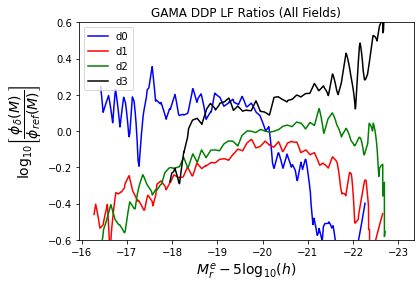

In [329]:
for idx in range(4):
    LF_G9  = Table.read(root + 'gama_gold_G9_ddp_n8_d0_{}_lumfn.fits'.format(idx))
    LF_G12 = Table.read(root + 'gama_gold_G12_ddp_n8_d0_{}_lumfn.fits'.format(idx))
    LF_G15 = Table.read(root + 'gama_gold_G15_ddp_n8_d0_{}_lumfn.fits'.format(idx))

    LF_G9_ref  = Table.read(root + 'gama_gold_G9_ddp_n8_d0_{}_lumfn.fits'.format(idx), 'REFERENCE')
    LF_G12_ref = Table.read(root + 'gama_gold_G12_ddp_n8_d0_{}_lumfn.fits'.format(idx), 'REFERENCE')
    LF_G15_ref = Table.read(root + 'gama_gold_G15_ddp_n8_d0_{}_lumfn.fits'.format(idx), 'REFERENCE')
    
    LF_G9_curve = interp1d(LF_G9['MEDIAN_M'], LF_G9['PHI_IVMAX'], kind='linear', copy=True, bounds_error=False, fill_value=0.0, assume_sorted=False)
    LF_G12_curve = interp1d(LF_G12['MEDIAN_M'], LF_G12['PHI_IVMAX'], kind='linear', copy=True, bounds_error=False, fill_value=0.0, assume_sorted=False)
    LF_G15_curve = interp1d(LF_G15['MEDIAN_M'], LF_G15['PHI_IVMAX'], kind='linear', copy=True, bounds_error=False, fill_value=0.0, assume_sorted=False)

    
    x=np.c_[LF_G9_ref['MS'], np.array(LF_G9_curve(LF_G9_ref['MS'])/LF_G9_ref['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G12_curve(LF_G12_ref['MS'])/LF_G12_ref['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G15_curve(LF_G15_ref['MS'])/LF_G15_ref['d{}_REFSCHECHTER'.format(idx)])]

    #x_ref=np.c_[bin_centres, np.array(LF_G9['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G12['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G15['d{}_REFSCHECHTER'.format(idx)])]

    
    #x=np.c_[bin_centres, np.array(LF_G9['PHI_IVMAX']/LF_G9['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G12['PHI_IVMAX']/LF_G12['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G15['PHI_IVMAX']/LF_G15['d{}_REFSCHECHTER'.format(idx)])]

    LF_mean = np.mean(x[:,1:], axis=1)
    LF_std = np.std(x[:,1:], axis=1) / np.sqrt(3)

    #LF_ref_mean = np.mean(x_ref[:,1:], axis=1)
    #LF_ref_std = np.std(x_ref[:,1:], axis=1) / np.sqrt(3)
    
    pl.plot(LF_G9_ref['MS'], np.log10(LF_mean), label='d{}'.format(idx), color=colour[idx])
    #pl.plot(bin_centres, np.log10(LF_ref_mean), alpha=0.5, color=colour[idx])
    #pl.errorbar(bin_centres, np.log10(LF_mean), np.log10(LF_std), label='d{}'.format(idx))
    
    #pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), gama_lf['PHI_N_ERROR'] / gama_lf['PHI_N'] / np.log(10.), label='NOWEIGHT', alpha=0.4)
    #pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), gama_lf['PHI_IVMAX_ERROR'] / gama_lf['PHI_IVMAX'] / np.log(10.), label='IVMAX')

    

plt.ylabel(r'$\log_{10} \left[ \dfrac{\phi_\delta(M)}{\phi_{ref}(M)} \right]$', fontsize=14)

plt.xlabel(r'$M_r^e - 5 \log_{10}(h)$', fontsize=14)


plt.title(r'GAMA DDP LF Ratios (All Fields)')

#pl.ylim(-4.25, -.75)
#pl.xlim(-23., -15.5)
pl.ylim(-0.6, 0.6)
pl.gca().invert_xaxis()
pl.legend(frameon=True, loc=2)
pl.show()

# Done.